## Sample 7.4 Hierarchical Model: The distance from the Sun to the Galactic center

In [8]:
%matplotlib inline
#posteior distribution of binomial data
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import astropy.io.fits as fits
import scipy.special as special

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

R_j = np.array([[7.9,0.75],
       [7.7,0.4],
       [8.33,0.35],
       [8.27,0.13],
       [8.92,0.56],
       [8.03,0.32],
       [8.34,0.19],
       [8.05,0.45],
       [8.08,0.62],
       [7.45,0.66],
       [8.27,0.41],
       [8.30,0.35],
       [8.70,0.50],
       [8.27,0.40],
       [8.33,0.15],
       [7.58,0.57],
       [7.50,0.60],
       [7.90,0.36],
       [7.98,0.51],
       [8.24,0.43],
       [8.60,0.81],
       [7.50,0.30],
       [8.20,0.20],
       [7.94,0.76],
       [7.40,0.28],
       [7.10,0.54]])

#prior of tau, non-informative prior used here
def prior_tau(tau):
    return 1#/tau**2

#posterior of tao given y, in logarithmic form
def lnpost_tau_y(tau, y_bar, sigma2, J):
    lnp = np.zeros(np.shape(tau))
    for i in range(len(tau)):
        inv_s2 = 1/(sigma2+tau[i]**2)
        mu_hat = np.sum(y_bar*inv_s2)/np.sum(inv_s2)
        V_mu = 1/np.sum(inv_s2)
        lnp[i] = prior_tau(tau[i])+0.5*np.log(V_mu)
        #print inv_s2,mu_hat,V_mu,lnp[i]
        if J>1:
            for j in range(J):
                lnp[i] += 0.5*np.log(inv_s2[j])-\
                    0.5*(y_bar[j]-mu_hat)**2*inv_s2[j]
        else:
            lnp[i] += 0.5*np.log(inv_s2)-\
                0.5*(y_bar-mu_hat)**2*inv_s2
        #print 0.5*np.log(inv_s2)-\
         #       0.5*(y_bar-mu_hat)**2*inv_s2
    return lnp

def draw_tau(y_bar, sigma2, J, N=10000, \
             xmin=0,xmax=2,ymin=0,ymax=0.006, dy=0):
    x = []
    k = 0
    m = 0
    while k<N and m <= 3:
        x0 = np.random.uniform(low=xmin,high=xmax,size=N*20)
        y0 = np.log(np.random.uniform(low=ymin,\
                    high=ymax,size=N*20))
        y1 = lnpost_tau_y(x0,y_bar,sigma2,J)-dy
        
        ind = (y0<y1)
        x.append(x0[ind])
        k = k + np.sum(ind)
        m += 1
        #print k,m
    xx = np.array(x).reshape((k,1))
    
    return (xx[0:N])

#draw mu from its conditional posterior given tau and y
def draw_condpost_mu(y_bar, sigma2, tau, N):
    mu = np.zeros(np.shape(tau))
    for i in range(N):
        inv_s2 = 1/(sigma2+tau[i]**2)
        mu_hat = np.sum(y_bar*inv_s2)/np.sum(inv_s2)
        V_mu = 1/np.sum(inv_s2)
        mu[i] = np.random.normal(mu_hat, np.sqrt(V_mu))
    return mu






8.033846153846154


Text(0.5, 0, '$\\tau$')

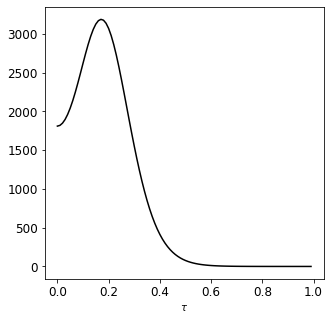

In [9]:
#random draw
N = 50000
y_bar = R_j[:,0]
sigma2 = R_j[:,1]**2
J = len(R_j)
print(np.mean(y_bar))
taugrid = np.arange(0.0,1,0.01)
lnp = lnpost_tau_y(taugrid, y_bar, sigma2, J)

fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.plot(taugrid,np.exp(lnp),'k-')
ax.set_xlabel(r'$\tau$')
# fig.show()

In [10]:
tau_d = draw_tau(y_bar, sigma2, J, N,\
                xmin=0,xmax=1.,ymin=0,ymax=np.max(np.exp(lnp)), dy=0)
mu_d = draw_condpost_mu(y_bar, sigma2, tau_d, N)

Text(0.5, 0, '$\\tau$')

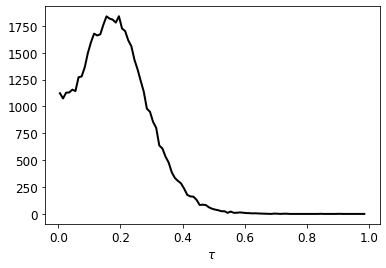

In [4]:
#draw posterior density of tau p(tau|y)
fig = plt.figure()
ax = fig.add_subplot(111)
taugrid = np.arange(0,1,0.01)
taucenter = (taugrid[:-1]+taugrid[1:])/2.0
htau,xedge = np.histogram(tau_d, bins=taugrid)
ax.plot(taucenter,htau,'k',linewidth=2)
ax.set_xlabel(r'$\tau$',fontsize=12)
# fig.show()

<ipython-input-5-928f4a61c30e>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


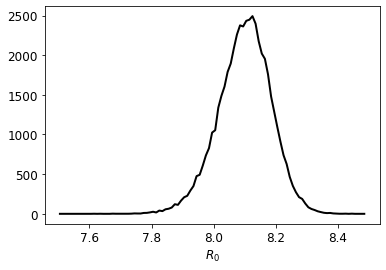

In [5]:
#draw posterior density of mu p(mu|tau,y)
fig = plt.figure()
ax = fig.add_subplot(111)
mugrid = np.arange(7.5,8.5,0.01)
mucenter = (mugrid[:-1]+mugrid[1:])/2.0
hmu,xedge = np.histogram(mu_d, bins=mugrid)
ax.plot(mucenter,hmu,'k',linewidth=2)
ax.set_xlabel(r'$R_0$',fontsize=12)
fig.show()

Text(0, 0.5, '$\\tau_0$')

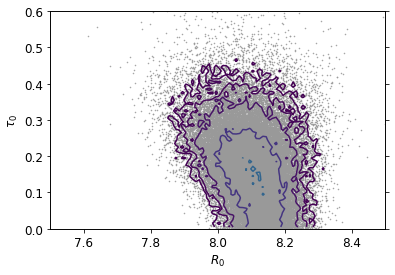

In [6]:
#draw joint posterior density of mu p(mu,tau|y)
taugrid2 = taugrid#np.arange(0,40,0.5)
taucenter2 = (taugrid2[:-1]+taugrid2[1:])/2.0
mugrid2 = mugrid#np.arange(-30,10,0.5)
mucenter2 = (mugrid2[:-1]+mugrid2[1:])/2.0
mumesh,taumesh = np.meshgrid(mucenter2, taucenter2)
mp,xedge,ydge = np.histogram2d(mu_d.reshape((N,)), \
        tau_d.reshape((N,)), bins=[mugrid2, taugrid2])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(mu_d,tau_d,'.',\
        markeredgecolor=[0.6,0.6,0.6],\
        markerfacecolor=[0.6,0.6,0.6],\
       markersize=1)
ax1 = ax.twinx()
ax1.contour(mumesh, taumesh, mp.T, \
    levels=np.array([5,10,20,50,100,150,200,300]))
ax1.set_xlim([7.5,8.5])
ax1.set_ylim([0,0.6])
ax1.set_yticklabels([])
ax.set_xlim([7.5,8.5])
ax.set_ylim([0,0.6])

ax.set_xlabel(r'$R_0$',fontsize=12)
ax.set_ylabel(r'$\tau_0$',fontsize=12)
# fig.show()

Text(0, 0.5, '$sd(\\theta_j|\\mu,\\tau,\\bar{y_{\\cdot j}}$)')

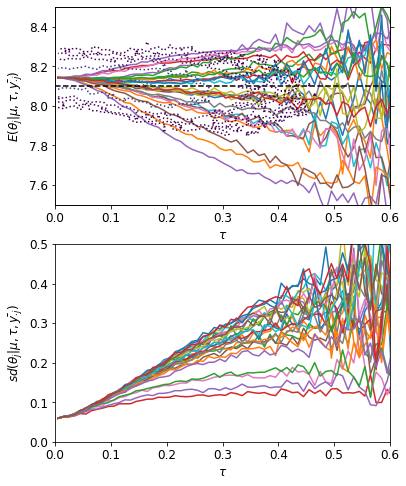

In [7]:
#sample theta_j from p(theta_j|mu,tao,y)
def draw_post_theta_j(mu,tau,y_bar_j,sigma2_j):
    V_j = 1/(1/sigma2_j+1/tau**2)
    theta_j_hat = (y_bar_j/sigma2_j+mu/tau**2)*V_j
    theta_j = np.random.normal(theta_j_hat, np.sqrt(V_j))
    return theta_j

#check individual samples
theta = np.zeros((J,N))
for i in range(J):
    theta[i,:] = draw_post_theta_j(\
        mu_d,tau_d,np.float(y_bar[i]),sigma2[i]).reshape((N))

E_theta = np.zeros((J,len(taucenter)))
D_theta = np.zeros((J,len(taucenter)))
for i in range(J):
    for t in range(len(taucenter)):
        ind = ((tau_d>taugrid[t]) & \
               (tau_d<=taugrid[t+1])).reshape((N,))
        if np.sum(ind)>5:
            #print np.shape(theta[i,ind.reshape((N,))])
            E_theta[i,t] = np.mean(theta[i,ind])
            D_theta[i,t] = np.sum((theta[i,ind]-\
                    E_theta[i,t])**2)/(np.sum(ind)-1)
        
taumesh,mumesh = np.meshgrid(taucenter2, mucenter2)
mp,xedge,ydge = np.histogram2d(tau_d.reshape((N,)), \
        mu_d.reshape((N,)), bins=[taugrid2, mugrid2])
fig = plt.figure(figsize=[6,8])
#mean_theta as a function of tau
ax = fig.add_subplot(211)
for i in range(J):
    ax.plot(taucenter, E_theta[i,:], '-')
ax.plot([0,10000],[np.mean(mu_d),np.mean(mu_d)],'k--')
ax1 = ax.twinx()
ax1.contour(taumesh,mumesh, mp.T, \
    levels=np.array([5,10,20,50,100,150,200,300]),\
           linestyles='dotted')
ax1.set_xlim([0,0.6])
ax1.set_ylim([7.5,8.5])
ax1.set_yticklabels([])
ax.set_xlim([0,0.6])
ax.set_ylim([7.5,8.5])
ax.set_xlabel(r'$\tau$',fontsize=12)
ax.set_ylabel(r'$E(\theta_j|\mu,\tau,\bar{y_{\cdot j}}$)',\
              fontsize=12)

ax = fig.add_subplot(212)
for i in range(J):
    ax.plot(taucenter, np.sqrt(D_theta[i,:]), '-')
ax.set_xlim([0,0.6])
ax.set_ylim([0,0.5])
ax.set_xlabel(r'$\tau$',fontsize=12)
ax.set_ylabel(r'$sd(\theta_j|\mu,\tau,\bar{y_{\cdot j}}$)',\
              fontsize=12)
# fig.show()